<a href="https://colab.research.google.com/github/AnilKamath27/DataWhizLab/blob/main/medium_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading original image to display

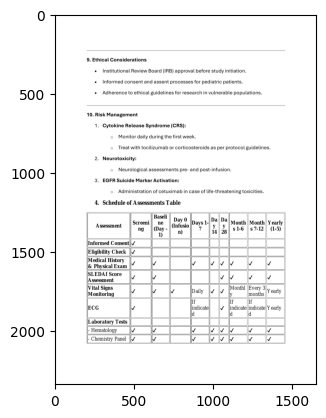

In [1]:
import cv2
import matplotlib.pyplot as plt
file=r'/content/page_4.png'
img = cv2.imread(file,0)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Inverted Image with global thresh holding

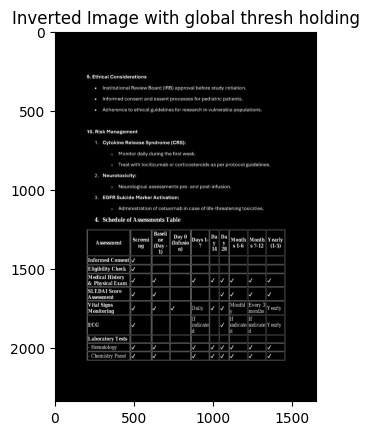

In [2]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

## Inverted Image with otsu thresh holding

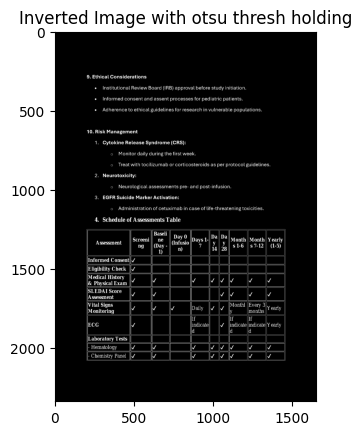

In [3]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Inverted image with both global and Otsu thresholding

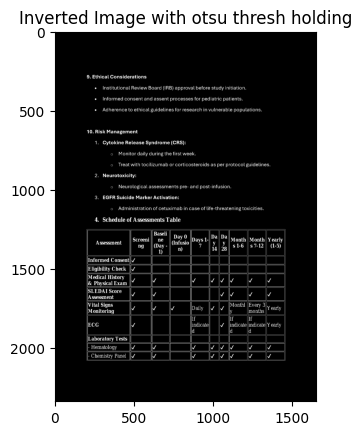

In [4]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Create a rectangular structuring element

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


# Morphological Operations

## Create a new structuring element to perform erosion on the image

First we need to get the vertical lines.

We create a vertical kernel with kernel width 1 and height the number of columns in image array divided by 200.

Erosion makes the pixel 1 only if all the pixels under kernel are 1.

We perform erosion for 5 iterations with the vertical kernel.

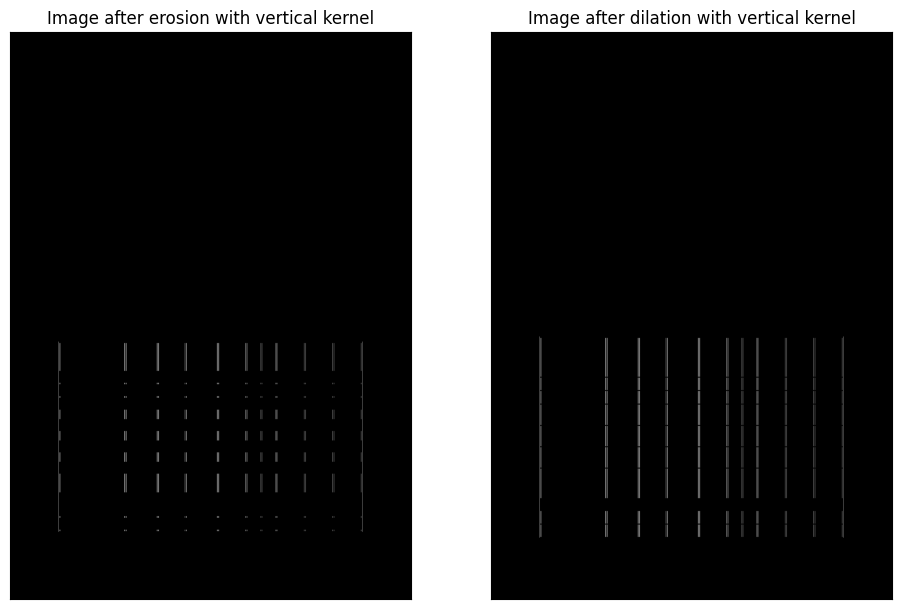

In [6]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

Dilation will make the pixel 1, if at least one of the pixels under the kernel is 1.

Similarly lets do the same with a horizontal lines to get the horizontal lines.

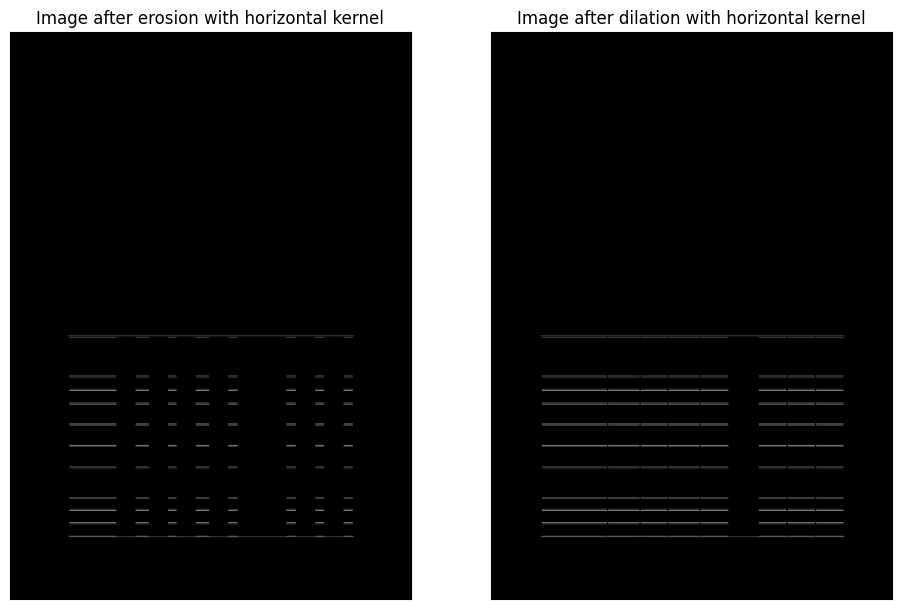

In [7]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

## Now we add the two images

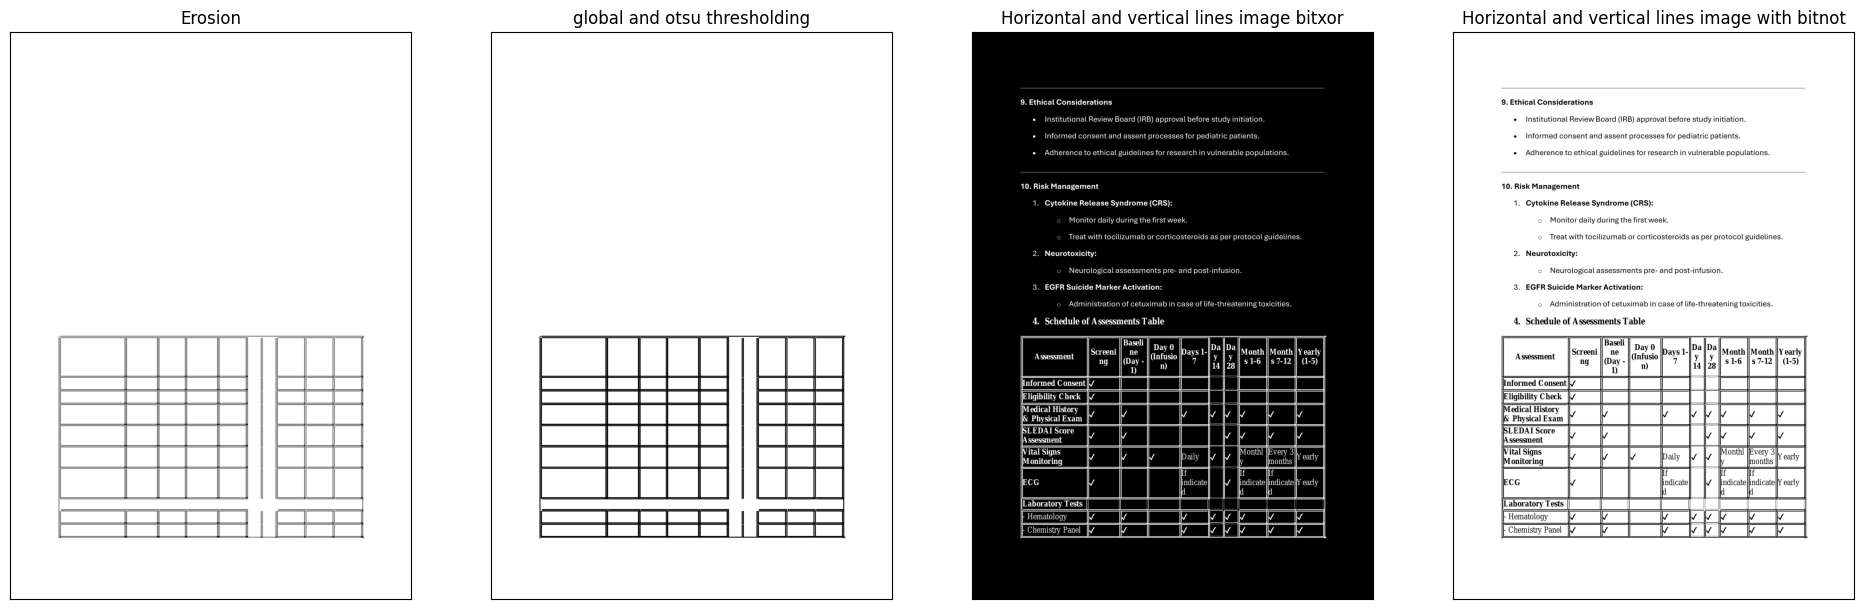

In [8]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [10]:
import pytesseract

## Let's get the contours from the grid that we have obtained by adding the horizontal and vertical lines.

In [11]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## Bounding Boxes

To get the coordinates of different boxes

In [12]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

Here we draw the contours on our image and also store them in list boxes. It is stored as a list (x,y,w,h) : x and y beind coordinates of top left corner and w and h being width and height of the box respectively.

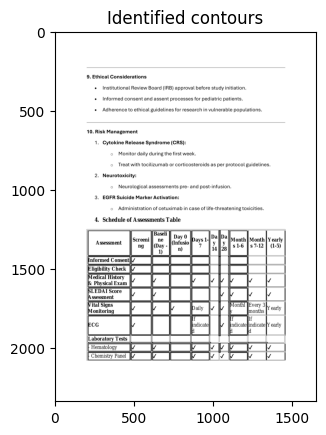

In [13]:
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

## Getting the rows and columns

## To store rows and columns :

- Now we add rows and columns.
- We calculate the mean height of all boxes.
- Initially, we append the first box to the columns list.
- The columns list is essentialy a temporary list.
- We assign previous box to the first box as well.
- We will loop through the remaining boundingBoxes list.
- At each iteration, we check if the y coordinate of the top left corner of the current box is less than the y coordinate of the previous box added with half the mean of all heights.
- If yes :
    - The current box is appended to columns list.
    - The current box is assigned to previous box.
    - Next we check if we are at the last index. If yes :
      - We append the entire column to rows list.
- If no :
    - We append the columns list to rows.
    - We assign the columns list to empty as this will start a new empty columns list.
    - We assign the current box to the previous box variable.
    - We append the current box to the empty column list we just created.


In [14]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
print("Rows")
for row in rows:
  print(row)

59.537953795379536
Rows
[[1094, 1261, 6, 165], [1038, 1261, 6, 165], [1033, 1261, 6, 165], [1334, 1263, 2, 155], [1217, 1263, 2, 155], [1105, 1263, 108, 155], [977, 1263, 1, 155], [865, 1263, 107, 155], [859, 1263, 1, 155], [731, 1263, 123, 155], [725, 1263, 1, 155], [617, 1263, 104, 155], [611, 1263, 1, 155], [483, 1263, 123, 155], [477, 1263, 1, 155], [210, 1263, 262, 155], [1452, 1263, 1, 155]]
[[1334, 1422, 2, 1], [1217, 1422, 2, 1], [1105, 1422, 108, 1], [977, 1422, 1, 1], [865, 1422, 107, 1], [859, 1422, 1, 1], [731, 1422, 123, 1], [725, 1422, 1, 1], [617, 1422, 104, 1], [611, 1422, 1, 1], [483, 1422, 123, 1], [477, 1422, 1, 1], [210, 1422, 262, 1], [1452, 1422, 1, 1], [1094, 1425, 6, 56], [1038, 1425, 6, 56], [1033, 1425, 6, 56], [864, 1425, 1, 1], [730, 1425, 1, 1], [616, 1425, 1, 1], [482, 1425, 1, 1], [1334, 1427, 2, 46], [1217, 1427, 2, 46], [1105, 1427, 108, 46], [977, 1427, 1, 46], [865, 1427, 107, 46], [859, 1427, 1, 46], [731, 1427, 123, 46], [725, 1427, 1, 46], [617, 14

Lets get the total cells in each row

In [15]:
total_cells=0
for i in range(len(row)):
  if len(row[i]) > total_cells:
    total_cells = len(row[i])
print(total_cells)

4


# Lets get the centre of cell

- We add the width of cell to left bottom x coordinate to the the x coordinate of centre of cell.

In [18]:
# center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
# print(center)

center = [int(rows[i][j][0] + rows[i][j][2] / 2)
          for i in range(len(rows))
          for j in range(len(rows[i]))
          if len(rows[i][j]) >= 3]  # Ensure rows[i][j] has at least 3 elements
print(center)


[1097, 1041, 1036, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1097, 1041, 1036, 864, 730, 616, 482, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1097, 1041, 1036, 864, 730, 616, 482, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1097, 1041, 1036, 864, 730, 616, 482, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1097, 1041, 1036, 864, 730, 616, 482, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611, 544, 477, 341, 1452, 1097, 1041, 1036, 864, 730, 616, 482, 1335, 1218, 1159, 977, 918, 859, 792, 725, 669, 611

In [19]:
center=np.array(center)
center.sort()
print(center)

[ 341  341  341  341  341  341  341  341  341  341  341  341  341  341
  341  341  341  346  477  477  477  477  477  477  477  477  477  477
  477  477  477  477  477  477  477  482  482  482  482  482  482  482
  544  544  544  544  544  544  544  544  544  544  544  544  544  544
  544  544  544  549  611  611  611  611  611  611  611  611  611  611
  611  611  611  611  611  611  611  616  616  616  616  616  616  616
  669  669  669  669  669  669  669  669  669  669  669  669  669  669
  669  669  669  673  725  725  725  725  725  725  725  725  725  725
  725  725  725  725  725  725  725  730  730  730  730  730  730  730
  792  792  792  792  792  792  792  792  792  792  792  792  792  792
  792  792  792  797  859  859  859  859  859  859  859  859  859  859
  859  859  859  859  859  859  859  864  864  864  864  864  864  864
  918  918  918  918  918  918  918  918  918  918  918  918  918  918
  918  918  918  923  977  977  977  977  977  977  977  977  977  977
  977 

# Now we create a list of the coordinates of the boxes

In [21]:
# boxes_list = []
# for i in range(len(rows)):
#     l=[]
#     for k in range(total_cells):
#         l.append([])
#     for j in range(len(rows[i])):
#         diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
#         minimum = min(diff)
#         indexing = list(diff).index(minimum)
#         l[indexing].append(rows[i][j])
#     boxes_list.append(l)
# for box in boxes_list:
#   print(box)

boxes_list = []
for i in range(len(rows)):
    l = [[] for _ in range(total_cells)]  # Create a list of empty lists for each cell
    for j in range(len(rows[i])):
        diff = abs(center - (rows[i][j][0] + rows[i][j][2] / 4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)

        # Ensure indexing is within the bounds of l
        if indexing < total_cells:
            l[indexing].append(rows[i][j])
        else:
            print(f"Index {indexing} out of range, skipping...")

    boxes_list.append(l)

# Print the boxes_list
for box in boxes_list:
    print(box)


Index 219 out of range, skipping...
Index 211 out of range, skipping...
Index 203 out of range, skipping...
Index 263 out of range, skipping...
Index 245 out of range, skipping...
Index 227 out of range, skipping...
Index 186 out of range, skipping...
Index 168 out of range, skipping...
Index 144 out of range, skipping...
Index 126 out of range, skipping...
Index 102 out of range, skipping...
Index 84 out of range, skipping...
Index 60 out of range, skipping...
Index 42 out of range, skipping...
Index 18 out of range, skipping...
Index 280 out of range, skipping...
Index 263 out of range, skipping...
Index 245 out of range, skipping...
Index 227 out of range, skipping...
Index 186 out of range, skipping...
Index 168 out of range, skipping...
Index 144 out of range, skipping...
Index 126 out of range, skipping...
Index 102 out of range, skipping...
Index 84 out of range, skipping...
Index 60 out of range, skipping...
Index 42 out of range, skipping...
Index 18 out of range, skipping...


## Extract image from the boxes and get the contents using pytesseract

- We extract the region of interest from the image.
- For the cell we resize it, then perform morphological operations on the extracted cell area to remove noise.
- Finally, we use pytesseract to convert the image to a string.
- We append the strings in each row first to temporary string s with spaces, and then we append this temporary string to the final dataframe.

In [22]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
print(dataframe_final)

[' Assessment\n\x0c', ' ', ' ', ' ', ' \x0c Informed C onsent\n\x0c', ' ', ' ', ' ', ' \x0c Eligibility Check\n\x0c', ' ', ' ', ' ', ' \x0c Medical History\n& Physical Exam\n\x0c', ' ', ' ', ' ', ' \x0c SLEDAI Score\nAssessment\n\x0c', ' ', ' ', ' ', ' \x0c Vital Signs\nMonitoring\n\x0c', ' ', ' ', ' ', ' \x0c ECG\n\x0c', ' ', ' ', ' ', ' \x0c', ' ', ' ', ' ', ' \x0c - Hematology\n\x0c', ' ', ' ', ' ', ' \x0c - Chemistry Panel\n\x0c', ' ', ' ', ' ']


## Next we create a Numpy array from the dataframe

In [29]:
arr = np.array(dataframe_final)
arr

array([' Assessment\n\x0c', ' ', ' ', ' ',
       ' \x0c Informed C onsent\n\x0c', ' ', ' ', ' ',
       ' \x0c Eligibility Check\n\x0c', ' ', ' ', ' ',
       ' \x0c Medical History\n& Physical Exam\n\x0c', ' ', ' ', ' ',
       ' \x0c SLEDAI Score\nAssessment\n\x0c', ' ', ' ', ' ',
       ' \x0c Vital Signs\nMonitoring\n\x0c', ' ', ' ', ' ',
       ' \x0c ECG\n\x0c', ' ', ' ', ' ', ' \x0c', ' ', ' ', ' ',
       ' \x0c - Hematology\n\x0c', ' ', ' ', ' ',
       ' \x0c - Chemistry Panel\n\x0c', ' ', ' ', ' '], dtype='<U36')

## **Creating a dataframe from extracted data**

- We reshape our array into a dataframe with the number of rows and columns.
- Lets print out the columns and check!

In [25]:
import pandas as pd

# Assuming 'arr' is your data array and 'rows' and 'total_cells' are already defined
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))

# Apply left alignment for all cells in the dataframe
data = dataframe.style.set_properties(align="left")

# Iterate over rows and columns and print the values
for i in range(len(rows)):
    for j in range(total_cells):
        # Access each element using iloc
        print(dataframe.iloc[i, j], end=" ")
    print()  # Newline after each row


 Assessment
       
  Informed C onsent
       
  Eligibility Check
       
  Medical History
& Physical Exam
       
  SLEDAI Score
Assessment
       
  Vital Signs
Monitoring
       
  ECG
       
        
  - Hematology
       
  - Chemistry Panel
       


## Printing Dataframe

In [26]:
print(dataframe)

                                        0  1  2  3
0                           Assessment\n         
1                   Informed C onsent\n         
2                   Eligibility Check\n         
3    Medical History\n& Physical Exam\n         
4            SLEDAI Score\nAssessment\n         
5             Vital Signs\nMonitoring\n         
6                                 ECG\n         
7                                                
8                        - Hematology\n         
9                   - Chemistry Panel\n         


In [27]:
dataframe

,0,1,2,3
0,Assessment\n,,,
1,Informed C onsent\n,,,
2,Eligibility Check\n,,,
3,Medical History\n& Physical Exam\n,,,
4,SLEDAI Score\nAssessment\n,,,
5,Vital Signs\nMonitoring\n,,,
6,ECG\n,,,
7,,,,
8,- Hematology\n,,,
9,- Chemistry Panel\n,,,


#### Final task is to save this data into a csv format for further uses.

- A output.csv file is generated in google colab. You can download it.

In [ ]:
dataframe.to_csv("output.csv")